### Importing Necessary Libraries

In [64]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier, plot_tree
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, matthews_corrcoef, balanced_accuracy_score

## Fucntion for Plotting Confusion Matrix 

In [ ]:
## def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y_test, prediction)
    ax= plt.subplot()
    sns.heatmap(cm,cmap='YlGnBu', annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix');  
    plt.show() 

## Reading And Initial Investigation Of Data

In [66]:
data=pd.read_csv('breast-cancer-new.csv')

In [67]:
data.shape

(4024, 16)

In [68]:
data.columns

Index(['Age', 'Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status'],
      dtype='object')

In [69]:
data.drop(['Race', 'Marital Status'], axis=1, inplace=True)

In [70]:
data.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,4024.0,NaN,NaN,NaN,53.972167,8.963134,30.0,47.0,54.0,61.0,69.0
T Stage,4024,4,T2,1786,NaN,NaN,NaN,NaN,NaN,NaN,NaN
N Stage,4024,3,N1,2732,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6th Stage,4024,5,IIA,1305,NaN,NaN,NaN,NaN,NaN,NaN,NaN
differentiate,4024,4,Moderately differentiated,2351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Grade,4024,4,2,2351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A Stage,4024,2,Regional,3932,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tumor Size,4024.0,NaN,NaN,NaN,30.473658,21.119696,1.0,16.0,25.0,38.0,140.0
Estrogen Status,4024,2,Positive,3755,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Progesterone Status,4024,2,Positive,3326,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Visualizng the features segregated by the classes

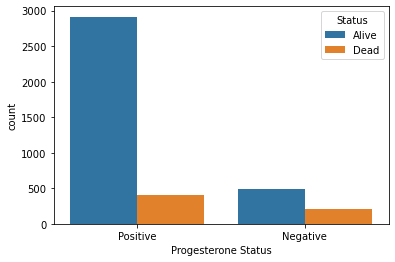

In [71]:
sns.countplot(x='Progesterone Status', hue='Status', data=data)
plt.show()

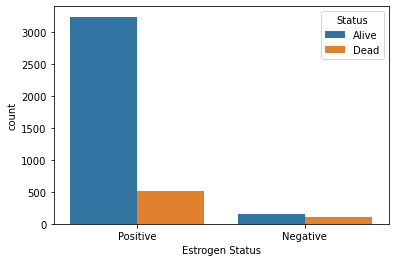

In [72]:
sns.countplot(x='Estrogen Status', hue='Status', data=data)
plt.show()

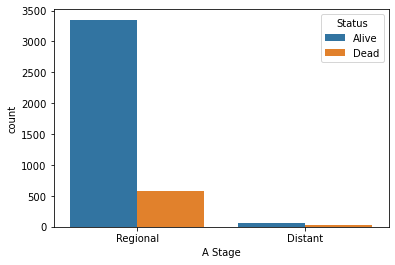

In [73]:
sns.countplot(x='A Stage', hue='Status', data=data)
plt.show()

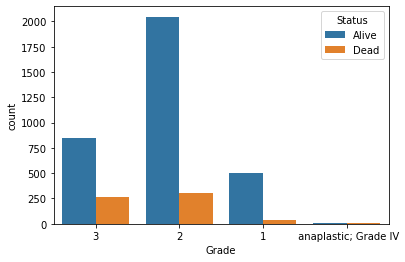

In [74]:
sns.countplot(x='Grade', hue='Status', data=data)
plt.show()

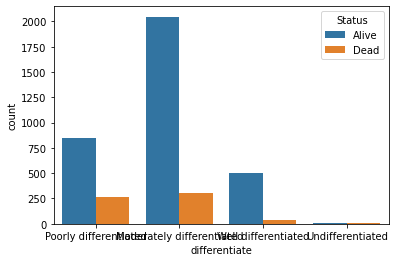

In [75]:
sns.countplot(x='differentiate', hue='Status', data=data)
plt.show()

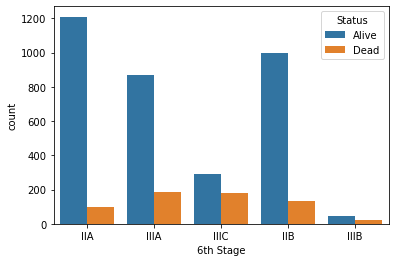

In [76]:
sns.countplot(x='6th Stage', hue='Status', data=data)
plt.show()

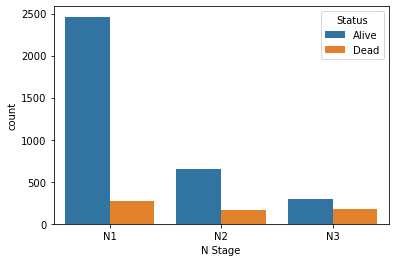

In [77]:
sns.countplot(x='N Stage', hue='Status', data=data)
plt.show()

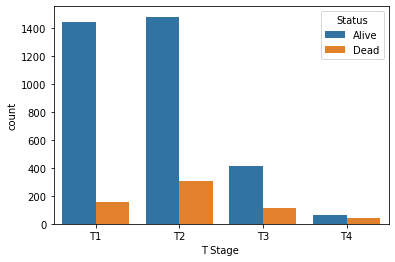

In [78]:
sns.countplot(x='T Stage ', hue='Status', data=data)
plt.show()

## Visualizing the Distribution Of the numerical features

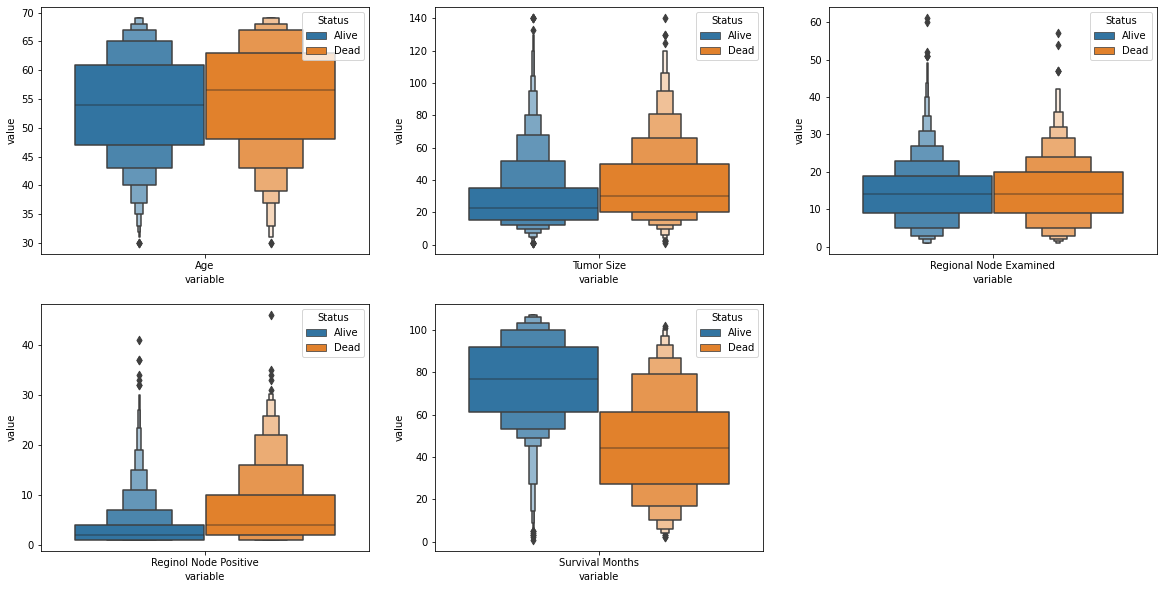

In [79]:
import math
test_readings=[col for col in data.columns if col not in ['T Stage ', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage','Estrogen Status',
       'Progesterone Status','Status']]
melted = data.melt(id_vars=['Status'])
fig, axes=plt.subplots(math.ceil(len(test_readings)/3),3, figsize=(20,10))
axes=axes.flatten()
for prop, ax in zip(test_readings, axes):
 sns.boxenplot(data=melted[melted.variable.isin([prop])],
  x='variable', y='value', hue='Status', ax=ax)
for ax in axes[len(test_readings):]:
 ax.remove()

## Specifying threshold and triming data to remove outliers

In [80]:
data=data.drop(data[data['Survival Months'] < 12].index)
data=data.drop(data[data['Age'] < 35].index)
data=data.drop(data[data['Tumor Size'] > 100].index)
data=data.drop(data[data['Regional Node Examined'] > 30].index)
data=data.drop(data[data['Reginol Node Positive'] > 20].index)

In [81]:
data.corr()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
Age,1.000000,-0.069756,-0.040246,0.007400,-0.021884
Tumor Size,-0.069756,1.000000,0.104945,0.261955,-0.071235
Regional Node Examined,-0.040246,0.104945,1.000000,0.311425,0.006079
Reginol Node Positive,0.007400,0.261955,0.311425,1.000000,-0.111978
Survival Months,-0.021884,-0.071235,0.006079,-0.111978,1.000000


In [82]:
data.shape

(3673, 14)

In [ ]:
## import math
test_readings=[col for col in data.columns if col not in ['T Stage ', 'N Stage','6th Stage',
       'differentiate', 'Grade', 'A Stage','Estrogen Status',
       'Progesterone Status','Status']]
melted = data.melt(id_vars=['Status'])
fig, axes=plt.subplots(math.ceil(len(test_readings)/3),3, figsize=(20,10))
axes=axes.flatten()
for prop, ax in zip(test_readings, axes):
 sns.boxenplot(data=melted[melted.variable.isin([prop])],
  x='variable', y='value', hue= 'Status',ax=ax)
for ax in axes[len(test_readings):]:
 ax.remove()

In [84]:
x=data[['Tumor Size', 'Reginol Node Positive', '6th Stage','Survival Months']]
x=x.rename(columns={'Tumor Size': 'Tumor_Size', 'Reginol Node Positive': 'Reginol_Node_Positive', '6th Stage': 'Stage_6', 'Survival Months': 'Survival_Months'})

## Preprosseing, standardization and splitting of data

In [85]:
from sklearn.preprocessing import LabelEncoder
categorical_cols = ['Stage_6']
encoders = {}
for col in categorical_cols:
    encoder = LabelEncoder()
    x[col] = encoder.fit_transform(x[col])
    encoders[col] = encoder

In [86]:
data['Status'] = data['Status'].map({'Alive':1, 'Dead':0 })
y=data['Status'].to_numpy()
y

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [87]:
transform = preprocessing.StandardScaler()
x_transformed=transform.fit_transform(x)

In [88]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 4)

In [89]:
x_test

,Tumor_Size,Reginol_Node_Positive,Stage_6,Survival_Months
2978,38,3,1,102
619,25,1,1,103
351,31,4,2,61
2997,45,14,4,51
3079,15,1,0,67
...,...,...,...,...
2583,20,2,0,95
1245,21,6,2,72
2386,19,1,0,99
3852,15,15,4,50


In [90]:
y_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,

## Instantiating Model Object, training and testing model

In [91]:
max_depth = 4
min_samples_leaf = 2
min_samples_split = 2
criterion = 'gini'
splitter = 'best'
clf= DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf, min_samples_split=min_samples_split, criterion=criterion, splitter=splitter)

In [92]:
training=clf.fit(x_train, y_train)

In [93]:
training.score(x_train, y_train)

0.9053778080326753

## Model Evaluation

In [94]:
from sklearn.tree import export_text
training=clf.fit(x_train, y_train)
feature_names=x.columns.tolist()
tree_rules = export_text(training, feature_names=feature_names)

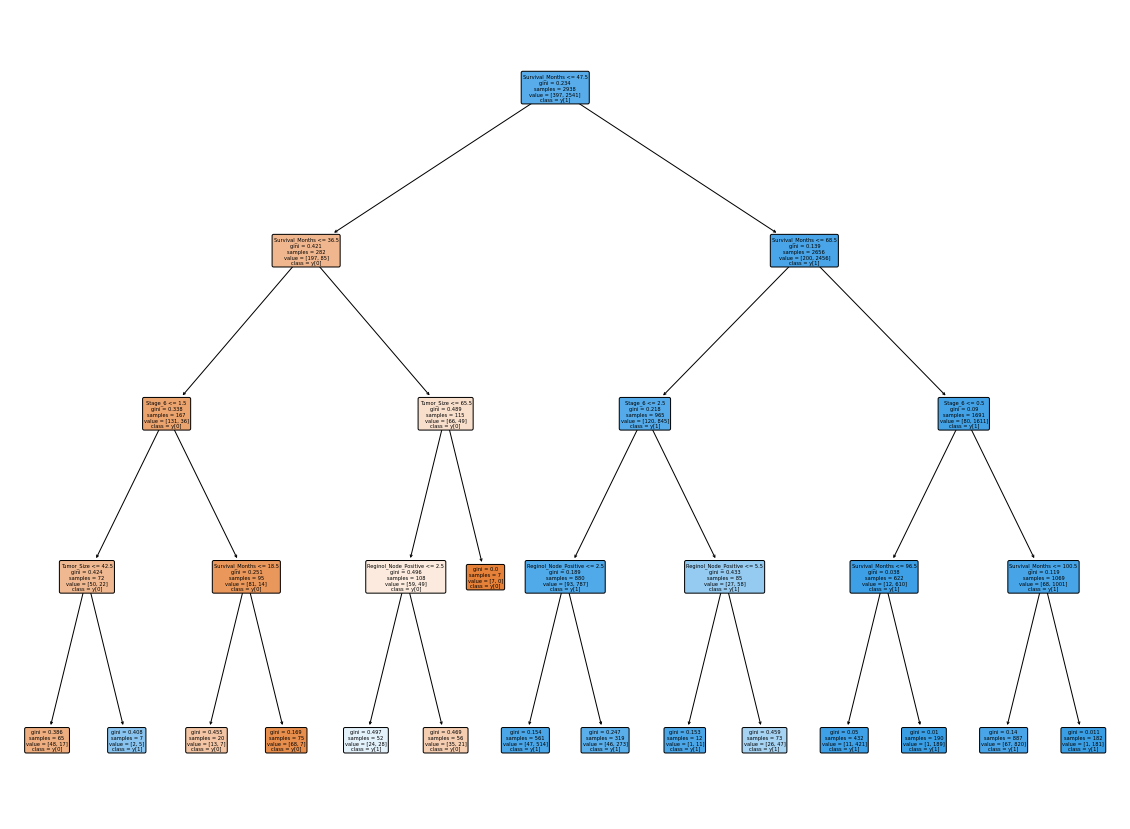

In [95]:
plt.figure(figsize=(20,15))
plot_tree(clf, feature_names=feature_names, filled=True, rounded=True, class_names=True)
plt.show()

In [96]:
prediction=clf.predict(x_test)

In [97]:
accuracy=clf.score(x_test, y_test)
accuracy

0.9197278911564626

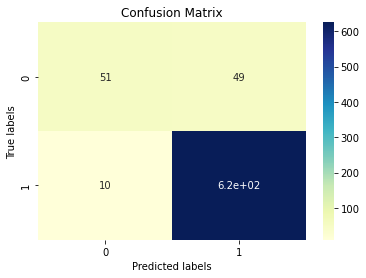

In [98]:
plot_confusion_matrix(y_test,prediction)

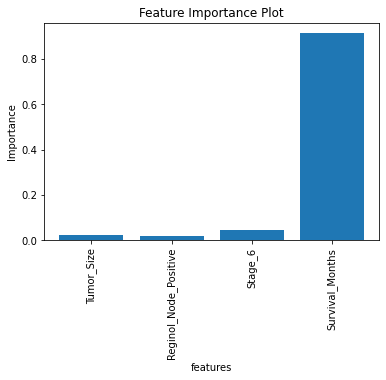

In [99]:
feature_importances = clf.feature_importances_
plt.bar(range(len(feature_importances)), feature_importances)
plt.xticks(range(len(feature_importances)), x.columns, rotation=90)
plt.xlabel('features')
plt.ylabel('Importance')
plt.title('Feature Importance Plot')
plt.show()

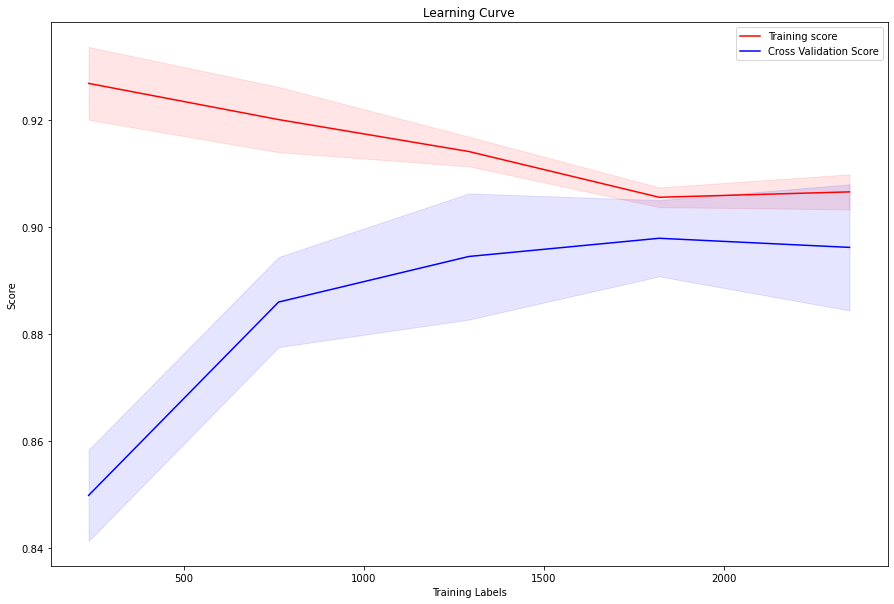

In [100]:
from sklearn.model_selection import learning_curve
train_size, train_scores, test_scores = learning_curve(clf, x_train, y_train, cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.figure(figsize=(15,10))
plt.plot(train_size, train_scores_mean, label='Training score', color='r')
plt.plot(train_size, test_scores_mean, label='Cross Validation Score', color='b')
plt.fill_between(train_size, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.fill_between(train_size, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='b')
plt.xlabel('Training Labels')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.show()

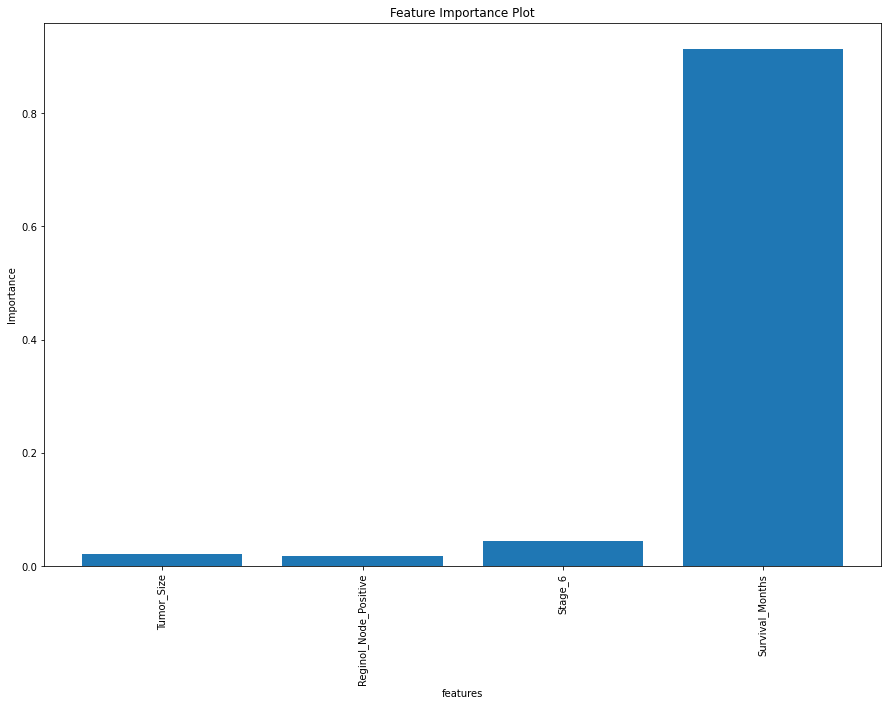

In [101]:
feature_importances = clf.feature_importances_
plt.figure(figsize=(15,10))
plt.bar(range(len(feature_importances)), feature_importances)
plt.xticks(range(len(feature_importances)), x.columns, rotation=90)
plt.xlabel('features')
plt.ylabel('Importance')
plt.title('Feature Importance Plot')
plt.show()

## Exporting model for deployment

In [102]:
import joblib 
joblib.dump(clf, 'cancer_model.pkl')
joblib.dump(encoders, 'encoders.pkl')
joblib.dump(transform, 'scaler.pkl')
joblib.dump(x_transformed, 'x_tranformed.pk1')

['x_tranformed.pk1']